In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [2]:
data = pd.read_csv('F:\Kuliah\Semester 7\Data Mining\Data Dow Jones\creditcard.csv', sep=',')
#data diambil dari kaggle.com/mlg-ulb/creditcardfraud

data2 = data

print (data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
print (data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
##memeriksa persentase data transaksi yang termasuk non fraud dan fraud pada dataset
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [8]:
##melakukan feature scaling
##Feature Scaling adalah suatu cara untuk membuat numerical data 
##pada dataset memiliki rentang nilai (scale) yang sama. 
##Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

##membuat sub-sample dengan data 50/50
##men-scale kolom Time dan Amount, karena kolom yang lain sudah di-scale
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler menghilangkan median dan men-scale data berdasarkan quartile range-nya
# StandardScaler menghilangkan mean dan men-scale data ke unit variance

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
#mengubah nama kolom Time Amount menjadi scaled_time dan scaled_amount
scaled_amount = data['scaled_amount']
#scaled_time = data['scaled_time']

data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
#data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
##Splitting Data dari Dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('Class', axis=1)
y = data['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

original_Xtrain.shape

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [11]:
#Membuat sub sample 50:50

#Karena ada 492 kasus transaksi fraud, maka akan diambil secara acak 492 kasus transaksi non-fraud

#merandom dataset
data = data.sample(frac=1)

#mengambil seluruh data fraud dan 492 kasus data non-fraud
fraud_data = data.loc[data['Class'] == 1]
nonFraud_data = data.loc[data['Class']==0][:492]

#menggabungkan data fraud dan non-fraud
normal_distributed_data = pd.concat([fraud_data, nonFraud_data])

#membuat dataframe baru yang berisi sub sample 50:50 kemudian mengacak baris pada data baru
subSample_data = normal_distributed_data.sample(frac=1, random_state=42)
# subSample_data.shape
subSample_data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
222842,0.181513,1.963033,-0.324752,-0.560659,0.293549,-0.254647,-0.126789,-0.411838,-0.036800,1.139476,...,-0.069007,-0.178320,-0.414064,0.334408,0.454989,-0.346183,-0.645499,0.030838,-0.019816,0
6719,-0.293440,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,0.632710,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1
275256,-0.100468,-1.151910,-0.399565,-0.674712,-2.257572,4.062472,2.778476,0.132998,0.951063,-0.294986,...,0.041540,-0.105252,-0.700066,0.061678,0.694377,0.029512,0.093576,0.005254,0.130929,0
42696,0.925452,-8.426814,6.241659,-9.946470,8.199614,-8.213093,-2.522046,-11.643028,5.339500,-7.051016,...,0.563869,2.427460,0.692667,0.020305,0.499809,0.467594,0.483162,1.195671,0.198294,1
41569,-0.293440,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,...,-0.634747,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1


In [12]:
#Undersampling sebelum melakukan cross-validation

X = subSample_data.drop('Class', axis=1)
y = subSample_data['Class']

#Memecah dataframe baru menjadi training dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#test_size = perbandingan pembagian training test dengan testing set
#total data = 984
#training set = 787
#testing set = 197

#mengubah ke array agar lebih mudah untuk algoritma klasifikasi
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# X_train.shape
# X_test.shape
#y_train.shape
#y_test.shape

In [13]:
#Menerapkan algoritma klasifikasi Logistic Regression

classifiers = {"LogReg" : LogisticRegression()}

from sklearn.model_selection import cross_val_score

t0 = time.time()
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train,
                                    cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training skor akurasinya", round(training_score.mean(),2)*100,
         "%")
t1 = time.time()

print ('Training logistic regression untuk sub sample 50:50 memakan waktu: {:3f} detik' .format(t1-t0))

Classifiers:  LogisticRegression training skor akurasinya 94.0 %
Training logistic regression untuk sub sample 50:50 memakan waktu: 0.128088 detik


In [14]:
from sklearn.model_selection import GridSearchCV

# t0 = time.time()
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
# print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
# t1 = time.time()
# print ('Cross Validation pada Logistic Regression untuk sub sample 50:50 memakan waktu: {:3f} detik' .format(t1-t0))

In [15]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
# Create a DataFrame with all the scores and the classifiers names.
t0 = time.time()
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
t1 = time.time()

print ('Menghitung skor AUC Logistic Regression untuk sub sample 50:50 memakan waktu: {:3f} detik' .format(t1-t0))

Logistic Regression:  0.9806347359575982
Menghitung skor AUC Logistic Regression untuk sub sample 50:50 memakan waktu: 0.245165 detik


In [16]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

t0= time.time()
y_pred = log_reg.predict(X_train)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))

t1= time.time()
print ('Menghitung recall, precision, f1, dan akurasi pada Logistic Regression untuk sub sample 50:50 memerlukan waktu: {:3f} detik' .format(t1-t0))

Classification Report Logistic Regression:
Recall Score: 0.94
Precision Score: 0.98
F1 Score: 0.96
Accuracy Score: 0.96
Menghitung recall, precision, f1, dan akurasi pada Logistic Regression untuk sub sample 50:50 memerlukan waktu: 0.022012 detik


In [17]:
#mengambil seluruh data fraud dan non-fraud
fraud_data_all = data2.loc[data2['Class'] == 1]
nonFraud_data_all = data2.loc[data2['Class']==0]

#menggabungkan data fraud dan non-fraud
normal_distributed_data_all = pd.concat([fraud_data_all, nonFraud_data_all])
normal_distributed_data_all.shape
#normal_distributed_data_all.head()
# data2.head()
#fraud_data_all.shape

(284807, 30)

In [18]:
X2 = normal_distributed_data_all.drop('Class', axis=1)
y2 = normal_distributed_data_all['Class']

#Memecah dataframe baru menjadi training dan test set
# from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=42)

#mengubah ke array agar lebih mudah untuk algoritma klasifikasi
X_train2 = X_train2.values
X_test2 = X_test2.values
y_train2 = y_train2.values
y_test2 = y_test2.values

#y_train2.shape
#y_test2.shape


In [19]:
t0 = time.time()
for key, classifier in classifiers.items():
    classifier.fit(X_train2, y_train2)
    training_score = cross_val_score(classifier, X_train2, y_train2,
                                    cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training skor akurasinya", round(training_score.mean(),2)*100,
         "%")
t1 = time.time()

print ('Training logistic regression untuk seluruh data memakan waktu: {:3f} detik' .format(t1-t0))

Classifiers:  LogisticRegression training skor akurasinya 100.0 %
Training logistic regression untuk seluruh data memakan waktu: 61.562849 detik


In [20]:
# t0 = time.time()
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg2 = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg2.fit(X_train2, y_train2)
# We automatically get the logistic regression with the best parameters.
log_reg2 = grid_log_reg2.best_estimator_

# log_reg_score2 = cross_val_score(log_reg2, X_train2, y_train2, cv=5)
# print('Logistic Regression Cross Validation Score: ', round(log_reg_score2.mean() * 100, 2).astype(str) + '%')
# t1 = time.time()
# print ('Cross Validation pada Logistic Regression untuk seluruh data memakan waktu: {:3f} detik' .format(t1-t0))

In [21]:
t0 = time.time()
log_reg_pred2 = cross_val_predict(log_reg2, X_train2, y_train2, cv=5,
                             method="decision_function")
print('Logistic Regression: ', roc_auc_score(y_train2, log_reg_pred2))
t1 = time.time()

print ('Menghitung skor AUC Logistic Regression untuk seluruh data memakan waktu: {:3f} detik' .format(t1-t0))

Logistic Regression:  0.960492719624437
Menghitung skor AUC Logistic Regression untuk seluruh data memakan waktu: 24.446222 detik


In [22]:
t0= time.time()
y_pred2 = log_reg2.predict(X_train2)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_train2, y_pred2)))
print('Precision Score: {:.2f}'.format(precision_score(y_train2, y_pred2)))
print('F1 Score: {:.2f}'.format(f1_score(y_train2, y_pred2)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train2, y_pred2)))

t1= time.time()
print ('Menghitung recall, precision, f1, dan akurasi pada Logistic Regression untuk seluruh data memerlukan waktu: {:3f} detik' .format(t1-t0))

Classification Report Logistic Regression:
Recall Score: 0.60
Precision Score: 0.87
F1 Score: 0.71
Accuracy Score: 1.00
Menghitung recall, precision, f1, dan akurasi pada Logistic Regression untuk seluruh data memerlukan waktu: 0.509337 detik


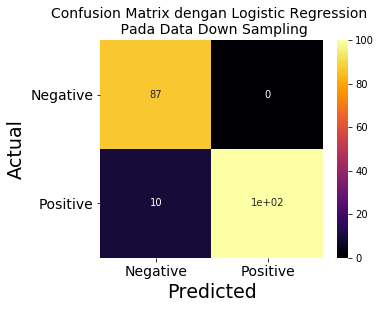

In [23]:
from sklearn.metrics import confusion_matrix

#Menerapkan confusion matrix pada testing set
y_pred_log_reg = log_reg.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)

fig, ax = plt.subplots(figsize=(5,4))
#classNames = ['Positive', 'Negative']
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.inferno)
plt.title("Confusion Matrix dengan Logistic Regression \n Pada Data Down Sampling", fontsize=14)
#tick_marks = np.arrange(len(classNames))
plt.xlabel('Predicted', fontsize=19)
plt.ylabel('Actual', fontsize=19)

# s = [['TN','FP'], ['FN', 'TP']]
# for i in range(2):
#     for j in range(2):
#         plt.text(j,i, str(s[i][j])+" = "+str(log_reg_cf[i][j]))

#TN = kiri atas -->Non Fraud
#FP = kanan atas
#FN = kiri bawah
#TP = kanan bawah -->Fraud

ax.set_xticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)
ax.set_yticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)

plt.show()


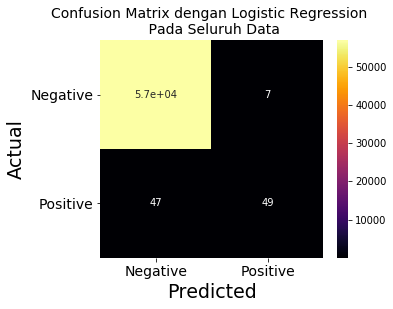

In [24]:
y_pred_log_reg2 = log_reg2.predict(X_test2)

log_reg_cf2 = confusion_matrix(y_test2, y_pred_log_reg2)

fig, ax = plt.subplots(figsize=(5,4))
#classNames = ['Positive', 'Negative']
sns.heatmap(log_reg_cf2, annot=True, cmap=plt.cm.inferno)
plt.title("Confusion Matrix dengan Logistic Regression \n Pada Seluruh Data", fontsize=14)
#tick_marks = np.arrange(len(classNames))
plt.xlabel('Predicted', fontsize=19)
plt.ylabel('Actual', fontsize=19)

#TN = kiri atas -->Non Fraud
#FP = kanan atas
#FN = kiri bawah
#TP = kanan bawah -->Fraud

ax.set_xticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)
ax.set_yticklabels(['Negative', 'Positive'], fontsize=14, rotation=360)

plt.show()

In [25]:
#Laporan Hasil Klasifikasi

print('Logistic Regression dengan Down Sampling:')
print(classification_report(y_test, y_pred_log_reg))


print('Logistic Regression dengan Seluruh Data:')
print(classification_report(y_test2, y_pred_log_reg2))

Logistic Regression dengan Down Sampling:
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        87
          1       1.00      0.91      0.95       110

avg / total       0.95      0.95      0.95       197

Logistic Regression dengan Seluruh Data:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56866
          1       0.88      0.51      0.64        96

avg / total       1.00      1.00      1.00     56962

